<a href="https://colab.research.google.com/github/forexms78/AI-05-/blob/main/10_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC%EC%99%80_%EC%95%99%EC%83%81%EB%B8%94(%EB%B3%B4%ED%8C%85%EB%B0%B0%EA%B9%85%EB%B6%80%EC%8A%A4%ED%8C%85%EC%8A%A4%ED%83%9C%ED%82%B9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

In [2]:
# 시각화를 위한 헬퍼 함수 (이전 실습에서 사용한 것과 동일)
def plot_decision_boundary(clf, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


    ax.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    ax.scatter(X[:, 0][y==0], X[:, 1][y==0], c='red', marker='o', label='Class 0')
    ax.scatter(X[:, 0][y==1], X[:, 1][y==1], c='blue', marker='x', label='Class 1')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    ax.grid(True)

In [3]:
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# 모델별 정확도 저장 딕셔너리
accuracies ={}

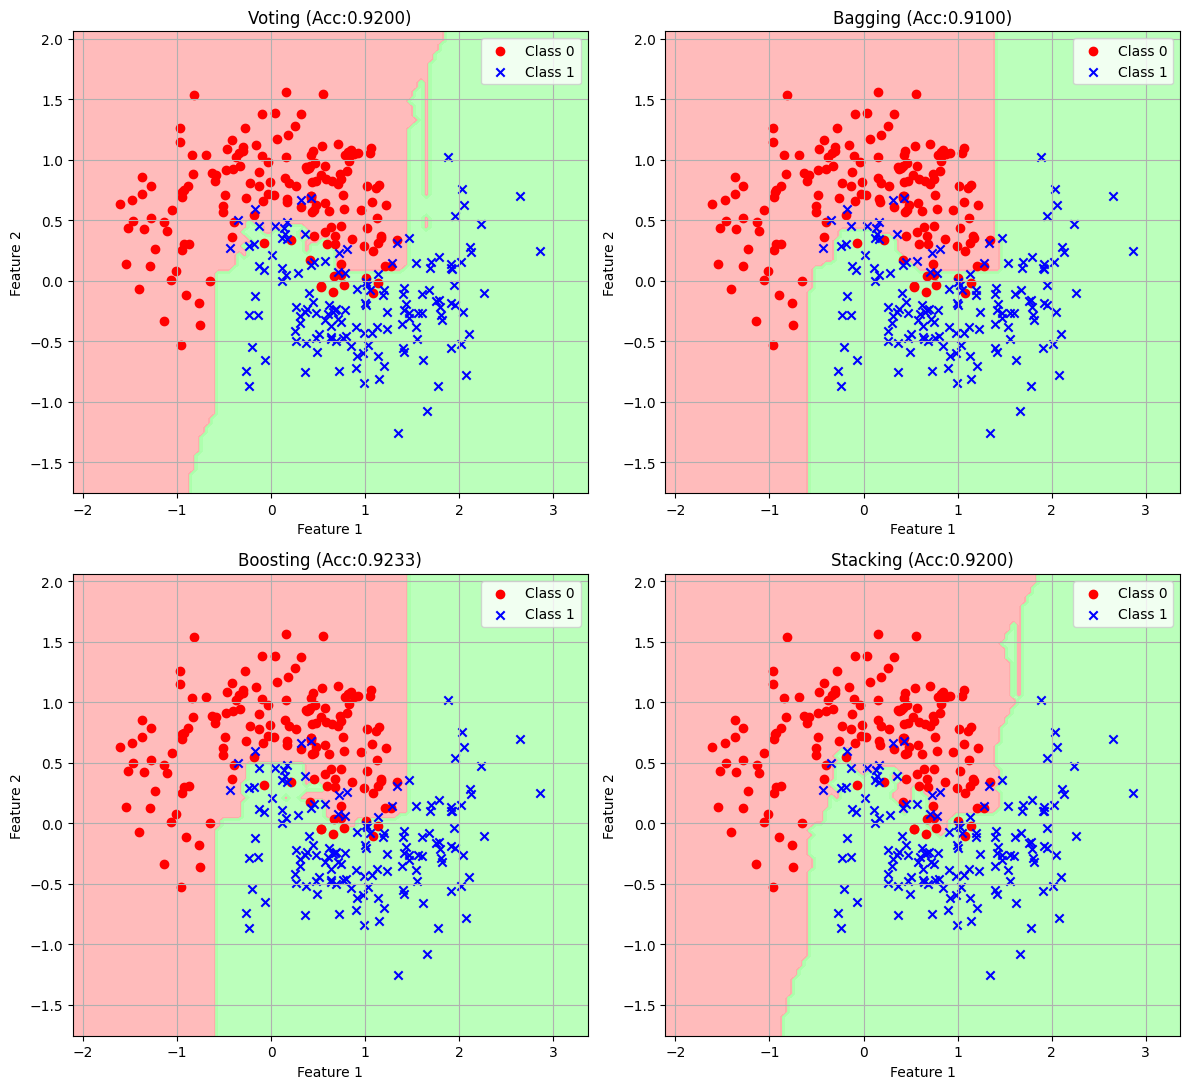

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12,11))
axes = axes.flatten()

# 1. 보팅
# 1-1. 기본 모델 세팅
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier(max_depth=5)
clf3 = KNeighborsClassifier(n_neighbors=5)
# 1-2. 소프트 보팅
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('KNN', clf3)],
    voting='soft',
    weights=[1,1,1]
)
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
accuracies['Voting'] = accuracy_voting
plot_decision_boundary(voting_clf, X_test, y_test, axes[0], f'Voting (Acc:{accuracy_voting:.4f})')

# 배깅
bagging_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=5),
    n_estimators=100,
    max_samples=0.7,                                             # 각 트리가 훈련 데이터의 70% 사용 (중복 허용)
    bootstrap=True
)
bagging_clf.fit(X_train, y_train)
y_pred_bagging = bagging_clf.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
accuracies['Bagging'] = accuracy_bagging
plot_decision_boundary(bagging_clf, X_test, y_test, axes[1], f'Bagging (Acc:{accuracy_bagging:.4f})')

# 3. 부스팅
gb_clf =GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3
)

gb_clf.fit(X_train, y_train)
y_pred_boosting = gb_clf.predict(X_test)
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
accuracies['Boosting'] = accuracy_boosting
plot_decision_boundary(gb_clf, X_test, y_test, axes[2], f'Boosting (Acc:{accuracy_boosting:.4f})')

# 4. 스태킹
# 4-1 기본 모델 설정
estimators = [
    ('lr', LogisticRegression()),
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('KNN', KNeighborsClassifier(n_neighbors=5))
]

# 4-2 메타 모델 설정
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

stacking_clf.fit(X_train, y_train)
y_pred_stacking = stacking_clf.predict(X_test)
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)

accuracies['Stacking'] = accuracy_stacking
plot_decision_boundary(stacking_clf, X_test, y_test, axes[3], f'Stacking (Acc:{accuracy_stacking:.4f})')

plt.tight_layout()


In [12]:
for model_name, accuracy in accuracies.items():
    print(f"{model_name} Accuracy: {accuracy:.4f}")

Voting Accuracy: 0.9200
Bagging Accuracy: 0.9100
Boosting Accuracy: 0.9233
Stacking Accuracy: 0.9200
